# Titanic Survival Prediction
Given a custom dataset which represents the details of passengers who were in the great 'Titanic' ship.

Our task is to find whether a person survived or not after the incident using various models provided by `scikit-learn`.

Your aim is to get the predictions using different models by tuning the parameters of your choice.

# Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualization
import seaborn as sns
import sklearn # machine learninng modelling

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-survival/train.csv
/kaggle/input/titanic-survival/test.csv


# Reading the Dataset

In [2]:
train=pd.read_csv('/kaggle/input/titanic-survival/train.csv')
test = pd.read_csv('/kaggle/input/titanic-survival/test.csv')

In [3]:
# first three rows of train dataset
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
1,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
2,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S


In [4]:
# first three rows of test dataset
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
1,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.700,G6,S
2,16,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.000,NaN,S


# Exploring the Dataset

In [5]:
# Summary of dataset
def summary(train):
    df=pd.DataFrame(index=train.columns)
    df['dtypes']=train.dtypes
    df['count']=train.count()
    df['#unique']=train.nunique()
    df['missing']=train.isna().sum()
    df['missing%'] = train.isna().sum()/len(train)*100
    df = pd.concat([df,(train.describe().T.drop('count',axis=1))],axis=1)
    return df

In [6]:
# Summary of train Dataset
summary(train).style.background_gradient(cmap='YlGnBu')

,dtypes,count,#unique,missing,missing%,mean,std,min,25%,50%,75%,max
PassengerId,int64,713,713,0,0.000000,442.210379,259.039639,1.000000,218.000000,438.000000,668.000000,891.000000
Survived,int64,713,2,0,0.000000,0.394109,0.489002,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,int64,713,3,0,0.000000,2.311360,0.838737,1.000000,2.000000,3.000000,3.000000,3.000000
Name,object,713,713,0,0.000000,nan,nan,nan,nan,nan,nan,nan
Sex,object,713,2,0,0.000000,nan,nan,nan,nan,nan,nan,nan
Age,float64,570,84,143,20.056101,29.127930,14.255420,0.420000,20.000000,28.000000,37.000000,74.000000
SibSp,int64,713,7,0,0.000000,0.535764,1.122634,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,int64,713,7,0,0.000000,0.391304,0.826039,0.000000,0.000000,0.000000,0.000000,6.000000
Ticket,object,713,566,0,0.000000,nan,nan,nan,nan,nan,nan,nan
Fare,float64,713,227,0,0.000000,33.082532,53.063304,0.000000,7.925000,14.454200,31.000000,512.329200


In [7]:
# Summary of dataset
def summary(test):
    df=pd.DataFrame(index=test.columns)
    df['dtypes']=test.dtypes
    df['count']=test.count()
    df['#unique']=test.nunique()
    df['missing']=test.isna().sum()
    df['missing%'] = test.isna().sum()/len(test)*100
    df = pd.concat([df,(test.describe().T.drop('count',axis=1))],axis=1)
    return df

In [8]:
# Summary of test Dataset
summary(test).style.background_gradient(cmap='YlOrBr')

,dtypes,count,#unique,missing,missing%,mean,std,min,25%,50%,75%,max
PassengerId,int64,179,179,0,0.000000,463.564246,251.949701,8.000000,259.500000,477.000000,681.500000,888.000000
Pclass,int64,179,3,0,0.000000,2.296089,0.825531,1.000000,2.000000,3.000000,3.000000,3.000000
Name,object,179,178,0,0.000000,nan,nan,nan,nan,nan,nan,nan
Sex,object,179,2,0,0.000000,nan,nan,nan,nan,nan,nan,nan
Age,float64,145,59,34,18.994413,31.925862,15.349746,0.750000,22.000000,32.000000,40.000000,80.000000
SibSp,int64,179,7,0,0.000000,0.469274,1.018318,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,int64,179,5,0,0.000000,0.340782,0.719755,0.000000,0.000000,0.000000,0.000000,5.000000
Ticket,object,179,168,0,0.000000,nan,nan,nan,nan,nan,nan,nan
Fare,float64,179,102,0,0.000000,28.598347,32.714426,0.000000,7.895800,14.000000,31.137500,153.462500
Cabin,object,43,38,136,75.977654,nan,nan,nan,nan,nan,nan,nan


<div style = "color: White; display: fill;
              border-radius: 5px;
              background-color: #20BEFF;
              font-size: 100%;
              font-family: Verdana"> 
    
<b>Insight:</b>
* We have numerical and  categorical columns
* Missing Values: The dataset contains NA values, null values handling  will be required .
* Outcome: Target variable is  "Survived" variable. Possibilities include: lived(1), died(0).

In [9]:
# train dataset - displaying rows if any have duplicate rows
train_duplicated_rows=train[train.duplicated()]
train_duplicated_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [10]:
# test dataset - displaying rows if any have duplicate rows
test_duplicated_rows=test[test.duplicated()]
test_duplicated_rows

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<div style = "color: White; display: fill;
              border-radius: 5px;
              background-color:  #20BEFF;
              font-size: 100%;
              font-family: Verdana">
    
* There is no duplicated rows in dataset

In [11]:
#train dataset - displaying rows if any have null rows
train[train.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
2,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
3,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q
4,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S
5,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
708,697,0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
709,647,0,3,"Cor, Mr. Liudevit",male,19.0,0,0,349231,7.8958,NaN,S
710,629,0,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S
711,213,0,3,"Perkin, Mr. John Henry",male,22.0,0,0,A/5 21174,7.2500,NaN,S


In [12]:
# Get the count of all null values in each column present in the dataframe df and store it in a list named null_vals.
null_vals=train.isna().sum().values.tolist()
null_vals

[0, 0, 0, 0, 0, 143, 0, 0, 0, 0, 552, 1]

In [13]:
# Handle the  null values of Age , Embarked and Cabin column
train['Age']=train['Age'].fillna(train['Age'].mean())
train[['Cabin','Embarked']]= train[['Cabin','Embarked']].ffill()

In [14]:
# Get the count of all null values in each column present in the dataframe df and store it in a list named null_vals_after.
null_vals_after=train.isna().sum().values.tolist()
null_vals_after

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [15]:
#train dataset - displaying rows if any have null rows
test[test.isna().any(axis=1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
2,16,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
3,21,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
4,23,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
5,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
173,850,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
174,855,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S
176,881,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
177,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [16]:
# Get the count of all null values in each column present in the dataframe df and store it in a list named null_vals.
null_vals_test=test.isna().sum().values.tolist()
null_vals_test

[0, 0, 0, 0, 34, 0, 0, 0, 0, 136, 1]

In [17]:
# Handle the  null values of Age , Embarked and Cabin column
test['Age']=test['Age'].fillna(test['Age'].mean())
test[['Cabin','Embarked']]= test[['Cabin','Embarked']].ffill()

In [18]:
# Get the count of all null values in each column present in the dataframe df and store it in a list named null_vals_after.
null_vals_after_test=test.isna().sum().values.tolist()
null_vals_after_test

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [19]:
# Dataset Attributes Description
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #20BEFF; font-size:100%; text-align:left">

<h3 align="left"><font color='#d79190'>💡 Dataset Attributes Description:</font></h3>

<table border="1" cellpadding="5" cellspacing="0">
    <thead>
        <tr>
            <th>Attribute</th>
            <th>Description</th>
            <th>Values</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>PassengerId</td>
            <td>ID Number of  Passenger</td>
            <td>Numeric ID</td>
        </tr>
        <tr>
            <td>Survived</td>
            <td>Passenger Died or Lived</td>
            <td>1 = Lived, 0 = Died</td>
        </tr>
        <tr>
            <td>Pclass</td>
            <td>Passenger Onboarded Class</td>
            <td>1 = First Class , 2 = Second Class , 3 = Third Class</td>
        </tr>
        <tr>
            <td>Name</td>
            <td>Name of the Passenger</td>
            <td>Passenger Name</td>
        </tr>
        <tr>
            <td>Sex</td>
            <td>Gender of the Passenger</td>
            <td>0 = Male , 1 = Female</td>
        </tr>
        <tr>
            <td>Age</td>
            <td>Age of the Passenger</td>
            <td>Numeric</td>
        </tr>
        <tr>
            <td>SibSp</td>
            <td>Number of siblings or spouses traveling</td>
            <td>SibSp Numbers</td>
        </tr>
        <tr>
            <td>Parch</td>
            <td>Number of parents or children traveling</td>
            <td>Parch Numbers</td>
        </tr>
        <tr>
            <td>Ticket</td>
            <td>Ticket ID of the Passenger</td>
            <td>Alphanumeric</td>
        </tr>
        <tr>
            <td>Fare</td>
            <td>Cost of the Ticket</td>
            <td>Numeric</td>
        </tr>
        <tr>
            <td>Cabin</td>
            <td>Cabin ID</td>
            <td>Alphanumeric</td>
        </tr>
        <tr>
            <td>Embarked</td>
            <td>the port where the passenger embarked the ship (e.g., Southampton, Cherbourg, Queenstown)</td>
            <td>Southampton(S), Cherbourg(C), Queenstown(Q)</td>
        </tr>
    </tbody>
</table>

</div>

# Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


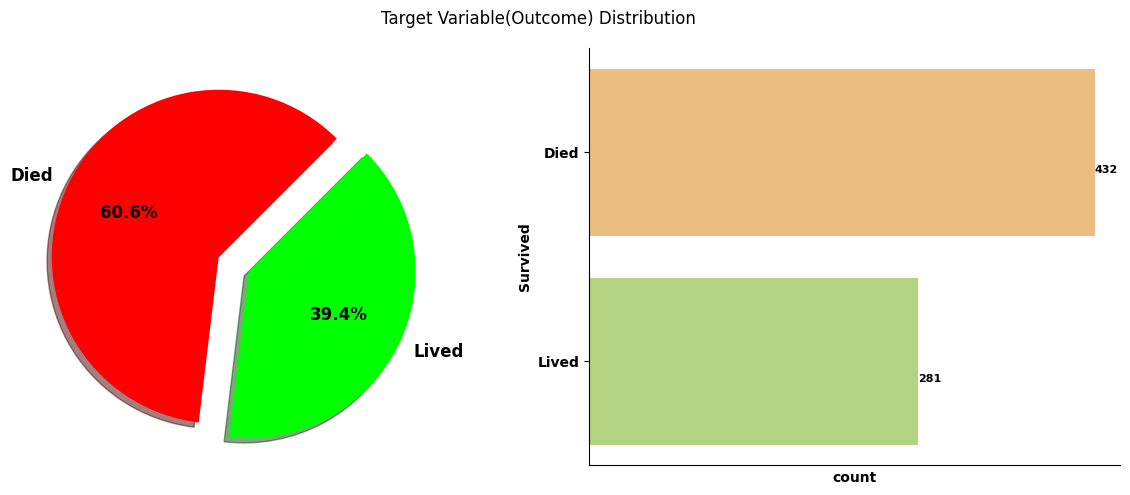

In [20]:
# Target variable distribution
fig,ax=plt.subplots(1,2,figsize=(12,5))

# ax[0] means first columns -- ax[0][0]
# ax[1] means second columns -- ax[0][1]

ax[0].pie(train.Survived.value_counts(),
          explode=[0.0,0.2],startangle= 45,
          shadow=True,colors=['#FF0000', '#00FF00'],
          autopct='%.1f%%',labels=['Died','Lived'],
          textprops={'fontsize': 12, 'weight': 'bold'}
         )

# explode -- to make slice in pie graph and array value represent the distance between one slice to another
# startangle -- to rotate slice
# shadow -- to create shadow of graph i.e. back image

x=train.Survived.value_counts()
y=['Died','Lived']
sns.barplot(x=x,y=y,ax=ax[1],palette='RdYlGn')

plt.setp(ax[1].get_yticklabels(),fontweight="bold")# get_yticklabels will fetch the yticklabels the setup will set again with bold changes
plt.setp(ax[1].get_xticklabels(),fontweight="bold")# get_xticklabels will fetch the yticklabels the setup will set again with bold changes

ax[1].set_xlabel('count',fontweight="bold") # set x label
ax[1].set_ylabel('Survived',fontweight="bold") # set x label

ax[1].spines['top'].set_visible(False) # it will remove the top boundry line
ax[1].spines['right'].set_visible(False) # it will remove the right boundry line

# it will remove the x-axis tick and label
ax[1].tick_params(
        axis='x',
        which='both',
        bottom=False,
        labelbottom=False
        )

val_count=train.Survived.value_counts()
for i,v in enumerate(val_count):
    ax[1].text(v,i+0.1,str(v), fontdict={'fontsize':8,'fontweight':'bold'})
# text --  is a function to add text to the graph
# v, i+0.1 -- These are the x and y coordinates where the text will be placed. v is the value from the s1 array, and i+0.1 adds a small vertical offset to position the text slightly above the corresponding bar in the chart.
# str(v) -- is the text 

fig.suptitle('Target Variable(Outcome) Distribution')
plt.tight_layout()
plt.show()